# Kepler Laws Mars , Mercury, Earth

Kepler’s equation can be used to determine the position of a planet in its orbit around the Sun at a given point in time. It reads:


$$2\pi (t - t_0) = E - e \sin E.$$



$$M = \frac{2\pi}{P}$$


Here, \(M\) denotes the mean anomaly, \(P\) the orbital period, \(E\) the eccentric anomaly, and \(e\) the eccentricity . The transit at the perihelion (closest approach to the sun) is at \(t = t_0\) with \(E = 0\). Hence, the aphelion of the orbit is at \(t - t_0 = P/2\) and \(E = \pi\). In general, Kepler’s equation can only be solved numerically.

The most simple scheme to solve the equation iteratively is the fixed-point iteration method:

$$
E_{i+1} = M + e \sin E_i,
$$

$$i = 0, 1, 2, \ldots.$$

Another scheme is the Newton iteration (also known as the Newton-Raphson method):

$$
E_{i+1} = E_i - \frac{g(E_i)}{g'_0(E_i)},
$$

$$i = 0, 1, 2, \ldots,$$

where

$$
\frac{dg}{dE} = 1 - e \cos E.
$$

(Hint: for eccentricities smaller than 0.8, \(E_0 = M\) is a good initial value for the iteration. For \(e > 0.8\), \(E_0 = \pi\) is better.)

The so-called true anomaly \(f\) (see Figure 1) is given by:
$$
$$
$$
g(E) = E - e \sin E - M
$$

and

$$
g'_0(E) = \frac{1}{\sqrt{1 - e^2}}.
$$

The distance to the Sun \(r\) is then given by:
$$
r = \frac{a(1 - e^2)}{1 + e \cos f},
$$

where \(a\) denotes the semi-major axis. The position of the planet in an \(x, y\) coordinate system with the Sun at its center (the focus of the ellipse) is
$$
x = r \cos f
$$

and

$$
y = r \sin f,
$$

$$
f = \phi - \phi_0
$$

where \(\phi_0\) denotes the length of the periapsis.



Examples are 

Exercise 1:

    Calculates and plots the orbits of Mercury and Halley's Comet around the Sun.
    Uses the fixed-point iteration and Newton-Raphson methods to solve Kepler's equation iteratively.
    Determines the number of iterations needed for each method to achieve a specified accuracy.
    Plots the number of iterations against time for both celestial bodies.

Exercise 2:

    Calculates and plots the distance between Earth and Mars over time from 1990 to 2020.
    Assumes undisturbed Kepler ellipses for Earth and Mars orbits.
    Determines mean anomalies for Earth and Mars at the start of 1990.
    Solves Kepler's equation iteratively for each year to calculate positions.
    Plots the mutual distance between Earth and Mars as a function of time.

The code provides insights into the computational aspects of solving Kepler's equation and simulating the motion of celestial bodies. It also explores the convergence behavior of iterative methods and visualizes the positions of planets over time.

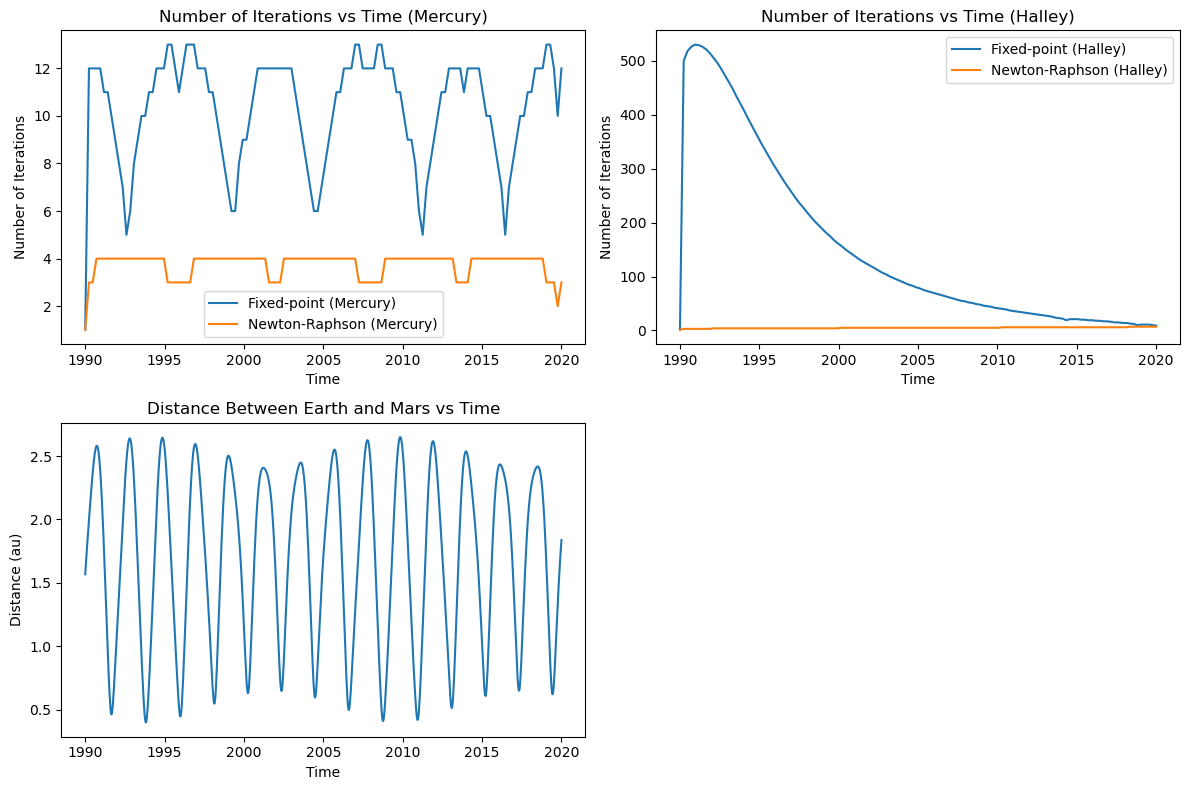

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to solve Kepler's equation using fixed-point iteration
def kepler_fixed_point(M, e, E0, tol=1e-9, max_iter=1000):
    E = E0
    for i in range(max_iter):
        E_next = M + e * np.sin(E)
        if abs(E_next - E) < tol:
            return E_next, i + 1  # Return the solution and the number of iterations
        E = E_next
    return None, max_iter  # Return None if the method did not converge

# Function to solve Kepler's equation using Newton-Raphson method
def kepler_newton_raphson(M, e, E0, tol=1e-9, max_iter=1000):
    E = E0
    for i in range(max_iter):
        g = E - e * np.sin(E) - M
        g_prime = 1 - e * np.cos(E)
        E_next = E - g / g_prime
        if abs(E_next - E) < tol:
            return E_next, i + 1  # Return the solution and the number of iterations
        E = E_next
    return None, max_iter  # Return None if the method did not converge

# Function to calculate x, y coordinates from eccentric anomaly E
def calculate_xy(a, e, E):
    r = a * (1 - e**2) / (1 + e * np.cos(E))
    f = 2 * np.arctan2(np.sqrt(1 + e) * np.tan(E / 2), np.sqrt(1 - e))
    x = r * np.cos(f)
    y = r * np.sin(f)
    return x, y

# Function to calculate mean anomaly based on initial mean anomaly and time
def calculate_mean_anomaly(M0, period, t, t0=1990):
    return M0 + 2 * np.pi * (t - t0) / period

# Function to calculate mutual distance between Earth and Mars
def calculate_distance(a_earth, a_mars, e_earth, e_mars, M_earth, M_mars, t):
    E_earth, _ = kepler_fixed_point(M_earth, e_earth, M_earth)
    E_mars, _ = kepler_fixed_point(M_mars, e_mars, M_mars)
    
    x_earth, y_earth = calculate_xy(a_earth, e_earth, E_earth)
    x_mars, y_mars = calculate_xy(a_mars, e_mars, E_mars)
    
    distance = np.sqrt((x_mars - x_earth)**2 + (y_mars - y_earth)**2)
    return distance

# Exercise 1
e_mercury, a_mercury = 0.205, 0.39
e_halley, a_halley = 0.967, 17.8

M0_mercury, M0_halley = 0, np.pi  # Initial mean anomaly values
t_values = np.linspace(1990, 2020, 128)

Niter_fixed_mercury, Niter_newton_mercury = [], []
Niter_fixed_halley, Niter_newton_halley = [], []

for t in t_values:
    M_mercury = calculate_mean_anomaly(M0_mercury, 0.241, t)
    M_halley = calculate_mean_anomaly(M0_halley, 76, t)

    _, iter_fixed_mercury = kepler_fixed_point(M_mercury, e_mercury, M_mercury)
    _, iter_newton_mercury = kepler_newton_raphson(M_mercury, e_mercury, M_mercury)
    Niter_fixed_mercury.append(iter_fixed_mercury)
    Niter_newton_mercury.append(iter_newton_mercury)

    _, iter_fixed_halley = kepler_fixed_point(M_halley, e_halley, M_halley)
    _, iter_newton_halley = kepler_newton_raphson(M_halley, e_halley, M_halley)
    Niter_fixed_halley.append(iter_fixed_halley)
    Niter_newton_halley.append(iter_newton_halley)

# Exercise 2
t_values_earth_mars = np.linspace(1990, 2020, 1000)
distance_values = []

for t in t_values_earth_mars:
    M_earth = calculate_mean_anomaly(1.017, 1, t)
    M_mars = calculate_mean_anomaly(5.985, 1.88, t)

    distance = calculate_distance(1, 1.524, 0.0167, 0.0934, M_earth, M_mars, t)
    distance_values.append(distance)

# Plotting
plt.figure(figsize=(12, 8))

# Exercise 1
plt.subplot(2, 2, 1)
plt.plot(t_values, Niter_fixed_mercury, label='Fixed-point (Mercury)')
plt.plot(t_values, Niter_newton_mercury, label='Newton-Raphson (Mercury)')
plt.title('Number of Iterations vs Time (Mercury)')
plt.xlabel('Time')
plt.ylabel('Number of Iterations')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, Niter_fixed_halley, label='Fixed-point (Halley)')
plt.plot(t_values, Niter_newton_halley, label='Newton-Raphson (Halley)')
plt.title('Number of Iterations vs Time (Halley)')
plt.xlabel('Time')
plt.ylabel('Number of Iterations')
plt.legend()

# Exercise 2
plt.subplot(2, 2, 3)
plt.plot(t_values_earth_mars, distance_values)
plt.title('Distance Between Earth and Mars vs Time')
plt.xlabel('Time')
plt.ylabel('Distance (au)')

plt.tight_layout()
plt.show()


# Inrerpolation

The problem involves utilizing polynomial interpolation for the Runge function  $f(x)=\frac{1}{1+x^2}$within the interval $[−5,5]$. Specifically, it investigates the influence of node distribution—comparing equidistant and non-equidistant nodes—on the accuracy of polynomial interpolation. The primary objective is to observe and analyze the behavior of the interpolation polynomial as well as the corresponding errors under these different node distributions.

The bonus section further enhances the analysis by offering additional insights into the quality of results for the two distinct sets of nodes.


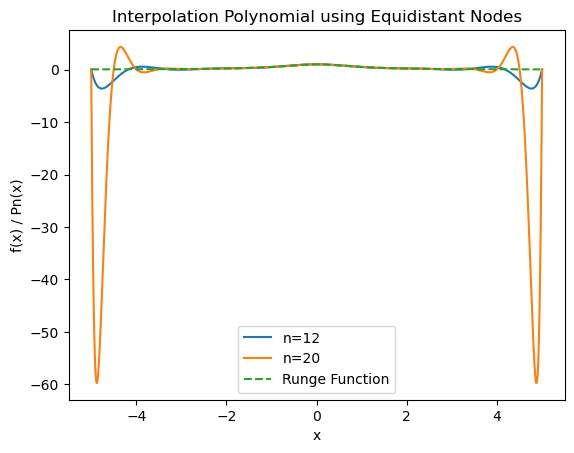

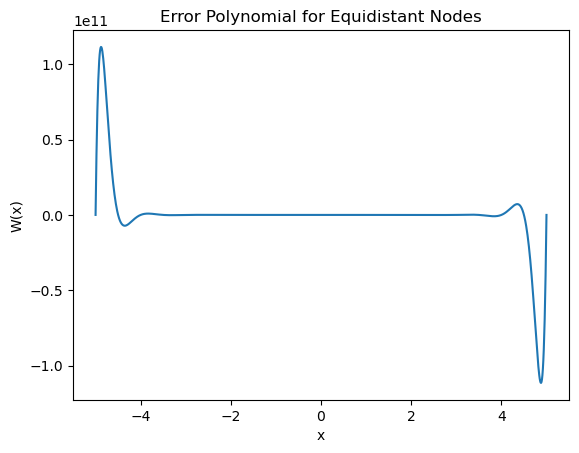

/tmp/ipykernel_745636/1532532199.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-k])
/tmp/ipykernel_745636/1532532199.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-k])
/tmp/ipykernel_745636/1532532199.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-k])
/tmp/ipykernel_745636/1532532199.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-k])


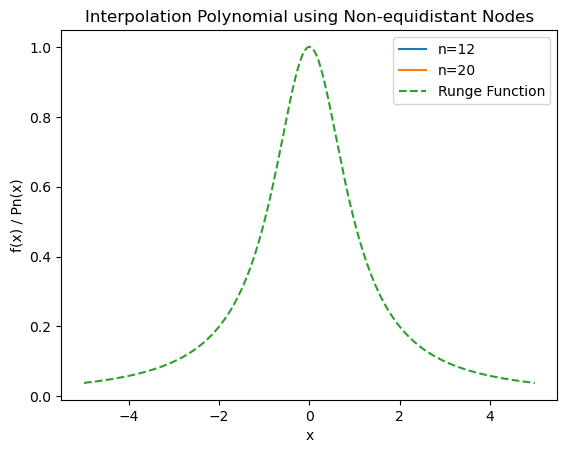

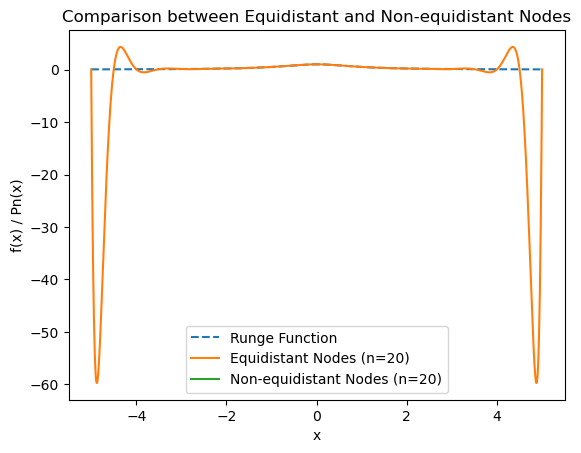

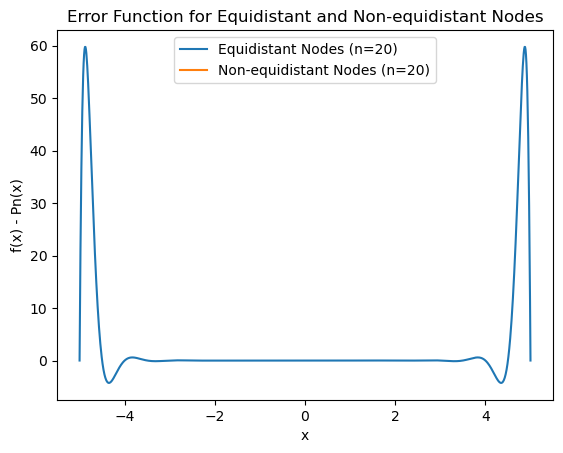

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge_function(x):
    return 1 / (1 + x**2)

def newton_interpolation(x_values, y_values):
    n = len(x_values) - 1
    coefficients = y_values.copy()
    
    for k in range(1, n+1):
        for i in range(n, k-1, -1):
            coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-k])

    return coefficients

def evaluate_polynomial(x, coefficients, x_values):
    result = coefficients[-1]
    for i in range(len(coefficients)-2, -1, -1):
        result = result * (x - x_values[i]) + coefficients[i]
    return result

def equidistant_nodes(n):
    return np.linspace(-5, 5, n+1)

def non_equidistant_nodes(n):
    a, b = -5, 5
    nodes = [(b - a) * 0.5 * (1 - np.cos(np.pi + 2 * np.pi * i / n)) for i in range(n+1)]
    return np.array(nodes)

def error_polynomial(x, x_values, coefficients):
    result = 1
    for i in range(len(x_values)):
        result *= (x - x_values[i])
    return result

# Part (a) - Equidistant Nodes
n_values = [12, 20]

for n in n_values:
    equidistant_x = equidistant_nodes(n)
    equidistant_y = runge_function(equidistant_x)
    
    coefficients = newton_interpolation(equidistant_x, equidistant_y)
    
    x_values = np.linspace(-5, 5, 1000)
    y_values_interpolated = [evaluate_polynomial(x, coefficients, equidistant_x) for x in x_values]
    
    plt.plot(x_values, y_values_interpolated, label=f'n={n}')

plt.plot(x_values, runge_function(x_values), label='Runge Function', linestyle='dashed')
plt.title('Interpolation Polynomial using Equidistant Nodes')
plt.xlabel('x')
plt.ylabel('f(x) / Pn(x)')
plt.legend()
plt.show()

# Part (b) - Error Polynomial for Equidistant Nodes
n_error = 20
equidistant_x_error = equidistant_nodes(n_error)
equidistant_y_error = runge_function(equidistant_x_error)

coefficients_error = newton_interpolation(equidistant_x_error, equidistant_y_error)

error_values = [error_polynomial(x, equidistant_x_error, coefficients_error) for x in x_values]

plt.plot(x_values, error_values)
plt.title('Error Polynomial for Equidistant Nodes')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.show()

# Part (c) - Non-equidistant Nodes
for n in n_values:
    non_equidistant_x = non_equidistant_nodes(n)
    non_equidistant_y = runge_function(non_equidistant_x)
    
    coefficients_non_equidistant = newton_interpolation(non_equidistant_x, non_equidistant_y)
    
    y_values_interpolated_non_equidistant = [evaluate_polynomial(x, coefficients_non_equidistant, non_equidistant_x) for x in x_values]
    
    plt.plot(x_values, y_values_interpolated_non_equidistant, label=f'n={n}')

plt.plot(x_values, runge_function(x_values), label='Runge Function', linestyle='dashed')
plt.title('Interpolation Polynomial using Non-equidistant Nodes')
plt.xlabel('x')
plt.ylabel('f(x) / Pn(x)')
plt.legend()
plt.show()

# Comparison between Equidistant and Non-equidistant Nodes
plt.plot(x_values, runge_function(x_values), label='Runge Function', linestyle='dashed')

plt.plot(x_values, y_values_interpolated, label='Equidistant Nodes (n=20)')
plt.plot(x_values, y_values_interpolated_non_equidistant, label='Non-equidistant Nodes (n=20)')

plt.title('Comparison between Equidistant and Non-equidistant Nodes')
plt.xlabel('x')
plt.ylabel('f(x) / Pn(x)')
plt.legend()
plt.show()

# Bonus - Error Function for Equidistant and Non-equidistant Nodes
error_values_equidistant = [runge_function(x) - evaluate_polynomial(x, coefficients, equidistant_x) for x in x_values]
error_values_non_equidistant = [runge_function(x) - evaluate_polynomial(x, coefficients_non_equidistant, non_equidistant_x) for x in x_values]

plt.plot(x_values, error_values_equidistant, label='Equidistant Nodes (n=20)')
plt.plot(x_values, error_values_non_equidistant, label='Non-equidistant Nodes (n=20)')

plt.title('Error Function for Equidistant and Non-equidistant Nodes')
plt.xlabel('x')
plt.ylabel('f(x) - Pn(x)')
plt.legend()
plt.show()


# Simpson

In [4]:
def simpsons_rule_error(f, a, b, f_4th_derivative):
    # Nodes of Simpson's rule
    x0 = a
    x1 = (a + b) / 2
    x2 = b

    # Calculate the error polynomial W2(x)
    def error_polynomial(x):
        return (x - x0) * (x - x1) * (x - x2)

    # Calculate the integral of the error polynomial
    Kn = (b - a) / 2

    # Calculate the integration error using the formula
    error = -Kn * f_4th_derivative(b) / 90

    return error

# Example usage:
# Define the function to be integrated and its fourth derivative
def f(x):
    return x**2  # Replace with your actual function

def f_4th_derivative(x):
    return 2  # Replace with the fourth derivative of your function

# Define the interval [a, b]
a = 0
b = 1

# Calculate the integration error using Simpson's rule (n=2)
error = simpsons_rule_error(f, a, b, f_4th_derivative)

# Print the result
print(f"The integration error of Simpson's rule (n=2) is: {error}")


The integration error of Simpson's rule (n=2) is: -0.011111111111111112




# Numerical Integration with Simpson's Rule

This Python script demonstrates the numerical integration of a function using Simpson's rule and compares the results with the analytical solution. In this example, the function to integrate is defined as `f(x) = sin(x)`. The analytical solution for the integral of this function is also provided.

## Code Overview

- **Function to Integrate (`f(x) = sin(x)`)**
  - Defines the function to be integrated.

- **Analytical Solution (`-cos(x)`)**
  - Provides the analytical solution for the integral of the function.

- **Simpson's Rule Implementation**
  - Defines the `simpsons_rule` function to perform numerical integration using Simpson's rule.

- **Integration Interval**
  - Specifies the interval of integration, in this case, [0, π/2].

- **Number of Subintervals for Simpson's Rule**
  - Chooses the number of subintervals for Simpson's rule (adjustable based on precision requirements).

- **Results**
  - Computes the integral using both Simpson's rule and the analytical solution.
  - Prints and compares the results.

- **Visualization**
  - Plots the function to integrate, the analytical solution, and the region under the curve covered by Simpson's rule.

This script serves as a practical example of numerical integration techniques and provides a visual comparison between the numerical and analytical approaches.


Simpson's Rule Integral: 1.0000000000211393
Analytical Solution Integral: 0.9999999999999999


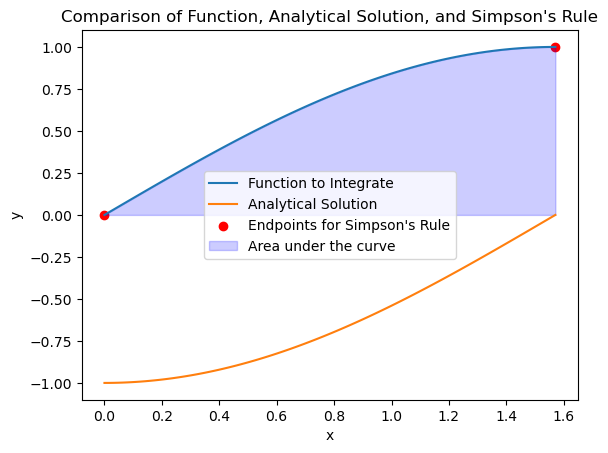

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)

# Define the analytical solution for the integral of the function
def analytical_solution(x):
    return -np.cos(x)

# Define the Simpson's rule function
def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x_values = np.linspace(a, b, n+1)
    integral = h/3 * (f(a) + 4*np.sum(f(x_values[1:n:2])) + 2*np.sum(f(x_values[2:n-1:2])) + f(b))
    return integral

# Define the interval [a, b]
a = 0
b = np.pi/2  # or any other suitable interval

# Define the number of subintervals for Simpson's rule
n_simpson = 200

# Calculate Simpson's rule values
integral_simpson = simpsons_rule(f, a, b, n_simpson)

# Calculate the analytical solution values
integral_analytical = analytical_solution(b) - analytical_solution(a)

# Print the results
print(f"Simpson's Rule Integral: {integral_simpson}")
print(f"Analytical Solution Integral: {integral_analytical}")

# Plot the functions and Simpson's rule
x_values = np.linspace(a, b, 100)
y_function = f(x_values)
y_analytical = analytical_solution(x_values)

plt.plot(x_values, y_function, label='Function to Integrate')
plt.plot(x_values, y_analytical, label='Analytical Solution')
plt.scatter([a, b], [f(a), f(b)], color='red', label='Endpoints for Simpson\'s Rule')
plt.fill_between(x_values, 0, y_function, alpha=0.2, color='blue', label='Area under the curve')
plt.title('Comparison of Function, Analytical Solution, and Simpson\'s Rule')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Numerical Integration Comparison: Trapezoidal vs. Simpson's Rule

This Python script demonstrates the use of numerical integration techniques, specifically the Trapezoidal Rule and Simpson's Rule. The integration is applied to two functions: Si(x) and C(x), with the goal of comparing the accuracy of the two methods.

## Trapezoidal Rule Implementation

The `trapezoidal_rule` function defines the Trapezoidal Rule, a simple numerical integration method. It calculates the integral of a function within a given interval using trapezoids.

## Simpson's Rule Implementation

The `simpsons_rule` function implements Simpson's Rule, a more accurate numerical integration technique. It approximates the integral by fitting parabolic arcs to the function.

## Adaptive Trapezoidal Integration

The `adaptive_trapezoidal` function demonstrates an adaptive approach, where the number of intervals is dynamically adjusted until a specified error tolerance is met.

## Adaptive Simpson's Rule Integration

The `adaptive_simpsons_rule` function showcases an adaptive version of Simpson's Rule, providing a more accurate result by recursively refining the integration.

## Example Usage

The script includes an example usage section where it calculates and plots the integrals of Si(x) and C(x) using both the Trapezoidal Rule and Simpson's Rule. The results are visualized for comparison.

### Plot

The generated plot illustrates the integrals of Si(x) and C(x) using both the Trapezoidal Rule and Simpson's Rule. The Trapezoidal Rule is represented by the blue lines, while the orange lines depict Simpson's Rule. The comparison allows for a visual assessment of the accuracy of the two integration methods.

Feel free to explore, modify, and experiment with the code for different functions and integration scenarios.


/tmp/ipykernel_745636/3803644253.py:16: RuntimeWarning: invalid value encountered in scalar divide
  integrand = lambda t: np.sin(t) / t
/tmp/ipykernel_745636/3803644253.py:16: RuntimeWarning: invalid value encountered in divide
  integrand = lambda t: np.sin(t) / t


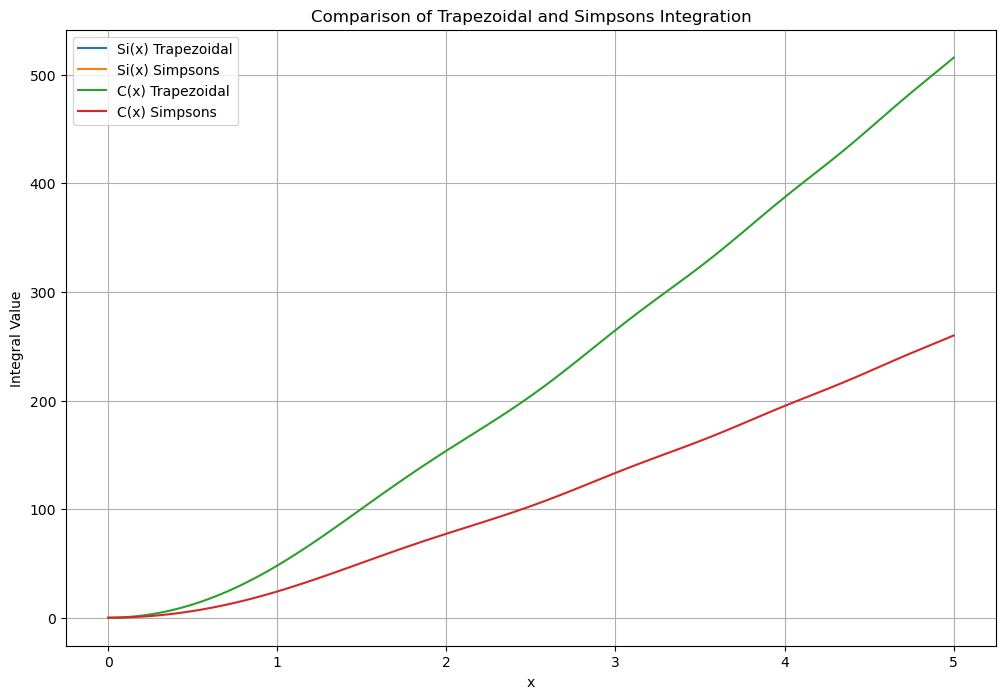

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(f, a, b, N):
    h = (b - a) / N
    x_values = np.linspace(a, b, N+1)
    integral = h * (0.5*f(a) + np.sum(f(x_values[1:N])) + 0.5*f(b))
    return integral

def simpsons_rule(f, a, b, N):
    h = (b - a) / N
    x_values = np.linspace(a, b, N+1)
    integral = h / 3 * (f(a) + 4*np.sum(f(x_values[1:N:2])) + 2*np.sum(f(x_values[2:N-1:2])) + f(b))
    return integral

def adaptive_trapezoidal(f, a, b, epsilon):
    N = 1
    I1 = trapezoidal_rule(f, a, b, N)
    error = np.inf

    while error > epsilon:
        N *= 2
        I2 = trapezoidal_rule(f, a, b, N)
        error = np.abs(I2 - I1)
        I1 = I2

    return I2

def recursive_asr(f, a, b, eps, whole):
    """Recursive implementation of adaptive Simpson’s rule."""
    c = (a + b) / 2.0
    left = simpsons_rule(f, a, c)
    right = simpsons_rule(f, c, b)
    whole = simpsons_rule(f, a, b)  # Corrected
    if abs(left + right - whole) <= 15 * eps:
        return left + right + (left + right - whole) / 15.0
    
    return recursive_asr(f, a, c, eps / 2.0, left) + recursive_asr(f, c, b, eps / 2.0, right)

def adaptive_simpsons_rule(f, a, b, eps):
    """Calculate integral of f from a to b with max error of eps."""
    return recursive_asr(f, a, b, eps, simpsons_rule(f, a, b))

# Example usage:
si_value = si(1)
c_value = c(5)

# Plotting
x_values = np.linspace(0, 5, 100)
si_values_trapezoidal = np.vectorize(lambda x: trapezoidal_rule(si, 0, x, 100))(x_values)
si_values_simpsons = np.vectorize(lambda x: simpsons_rule(si, 0, x, 100))(x_values)
c_values_trapezoidal = np.vectorize(lambda x: trapezoidal_rule(c, 0, x, 100))(x_values)
c_values_simpsons = np.vectorize(lambda x: simpsons_rule(c, 0, x, 100))(x_values)

plt.figure(figsize=(12, 8))
plt.plot(x_values, si_values_trapezoidal, label="Si(x) Trapezoidal")
plt.plot(x_values, si_values_simpsons, label="Si(x) Simpsons")
plt.plot(x_values, c_values_trapezoidal, label="C(x) Trapezoidal")
plt.plot(x_values, c_values_simpsons, label="C(x) Simpsons")
plt.legend()
plt.title("Comparison of Trapezoidal and Simpsons Integration")
plt.xlabel("x")
plt.ylabel("Integral Value")
plt.grid(True)
plt.show()


# Fresnel Interference

# Interference Pattern of Two Point Sources

This Python script generates and visualizes the interference pattern produced by two point sources of light. The interference pattern is calculated using the Fresnel integral, demonstrating the wave nature of light and interference phenomena.

## Function Description

The `interference_pattern` function takes parameters such as `x` (position), `d` (distance between sources), and `wavelength` (wavelength of light) to compute the intensity pattern resulting from the interference of two point sources.

## Parameters

- **Wavelength (`wavelength`):** The wavelength of light in arbitrary units.
- **Distance Between Sources (`d`):** The separation distance between the two light sources in arbitrary units.
- **Position (`x_values`):** An array of positions where the interference pattern is calculated, ranging from -10 to 10 in this example.

## Calculating Interference Pattern

The interference pattern is computed by applying the Fresnel integral to each position (`x_values`). The resulting intensity pattern represents the variations in light intensity due to constructive and destructive interference.

## Plotting

The script uses Matplotlib to visualize the interference pattern. The plot displays the intensity pattern against the position, providing a clear representation of how the interference varies spatially.

Feel free to experiment with different parameters and observe how changes in wavelength or source separation affect the interference pattern. This script serves as a visual tool for understanding the wave nature of light and interference.


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


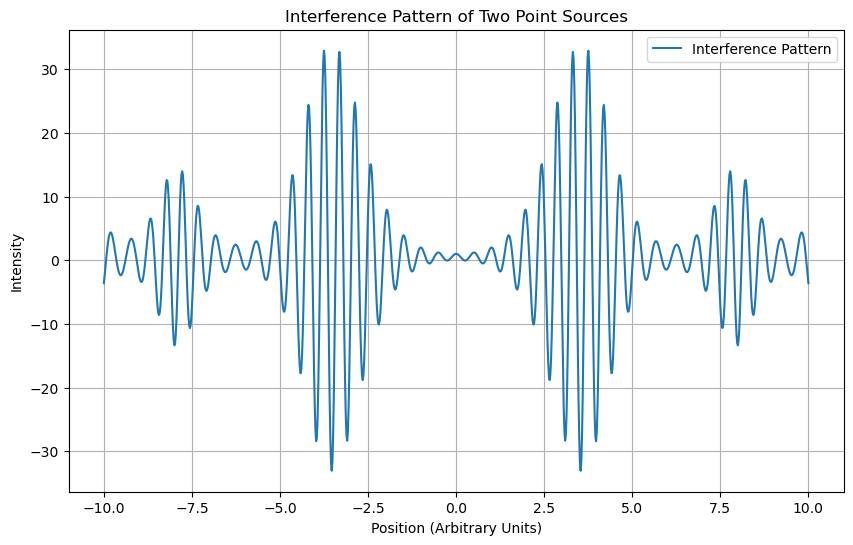

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

def interference_pattern(x, d, wavelength):
    k = 2 * np.pi / wavelength
    alpha = k * d / 2
    s, c = fresnel(x / np.sqrt(2 * alpha))
    intensity = 0.5 * (1 + np.cos(k * x + alpha * (s + 1j * c)))
    return intensity

# Parameters
wavelength = 0.5  # Wavelength of light (arbitrary units)
d = 1.0           # Distance between sources (arbitrary units)
x_values = np.linspace(-10, 10, 1000)

# Calculate interference pattern
intensity_pattern = interference_pattern(x_values, d, wavelength)

# Plot the interference pattern
plt.figure(figsize=(10, 6))
plt.plot(x_values, intensity_pattern, label='Interference Pattern')
plt.title('Interference Pattern of Two Point Sources')
plt.xlabel('Position (Arbitrary Units)')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()
